In [110]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [61]:
#Uploading file
from google.colab import files
uploaded = files.upload()

In [111]:
# Data understanding part
# Details such as member Id, tenure of loan, funded loan ,interest rate all provided for data aanalysis

# Reading file
df = pd.read_csv("loan.csv")
# Displaying file
df.head()

# Removing following columns since they are not NA (as members are not falling or not relevant for those categories/Variables)
#annual_inc_joint, dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m
#mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl
#inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op
#mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq
#num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0
#num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75
#tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit

# dropping columns which are not necessary for Analysis (NA)
df.drop(["annual_inc_joint", "dti_joint","verification_status_joint","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
         "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
         "inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op",
         "mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq",
         "num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0", 
         "num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75",
         "tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"], axis = 1, inplace = True)
         
# dropping columns url which are not necessary for Analysis (NA)
df.drop(["url"], axis = 1, inplace = True)

#Data Cleaning
#Removal of string that is mixed with int in column name "term"
df['term'] = df['term'].str.replace(r'months', '')


# display
df.head()

#df.to_csv('loan2.csv')
#Viewing modified file as CSV file
#files.download('loan2.csv')




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,May-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,May-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,Apr-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,May-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [112]:
# display
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,May-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,May-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,Apr-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,May-16,0.0,NaN,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [113]:
#Identify the Missing value in coulmn and percentage 
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

miss_values = null_values(df)
miss_values.head(20)

Dataframe has 57 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
mths_since_last_major_derog,39717,100.0
next_pymnt_d,38577,97.1
mths_since_last_record,36931,93.0
mths_since_last_delinq,25682,64.7
desc,12940,32.6
emp_title,2459,6.2
emp_length,1075,2.7
pub_rec_bankruptcies,697,1.8
last_pymnt_d,71,0.2
collections_12_mths_ex_med,56,0.1


In [114]:
#Remove column which is more than 90%
# dropping columns mths_since_last_major_derog, next_pymnt_d,mths_since_last_record which are more than 90%
df.drop(["mths_since_last_major_derog","next_pymnt_d", "mths_since_last_record"], axis = 1, inplace = True)
# display
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [115]:
df.to_csv('loan2.csv')
#Viewing modified file as CSV file
files.download('loan2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

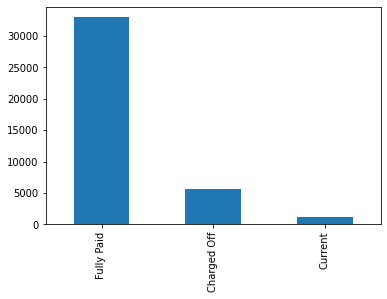

In [116]:
#Univariate analysis(categorical column)for loan status variable - Fully paid, current , carged off
df.loan_status.value_counts().plot(kind='bar')
#Below graph indicates that Fullypaid members are larger than the other

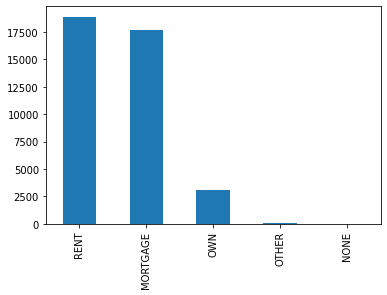

In [118]:
#Univariate analysis(categorical column) for loan status variable - Fully paid, current , carged off
df.home_ownership.value_counts().plot(kind='bar')
#Below graph indicates that most people are in RENT & MORTAGE homes getting loans than own house

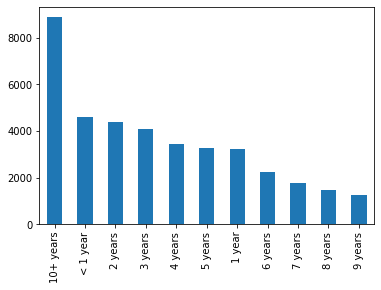

In [119]:
#Univariate analysis(categorical column) for loan status variable - Fully paid, current , carged off
df.emp_length.value_counts().plot(kind='bar')
#Below graph indicates out more than 8000 members who are employed for for 10+ years are seeking for loan

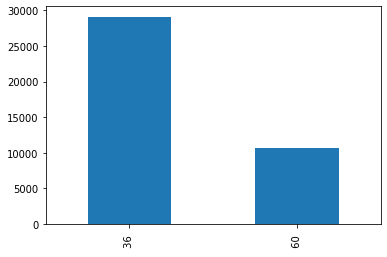

In [121]:
df.term.value_counts().plot(kind='bar')
#Below graph indicates that 36 months are reasonable term for repayment

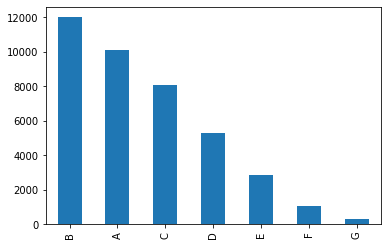

In [122]:
df.grade.value_counts().plot(kind='bar')
#Below graph indicates that B grade category is higher than the other

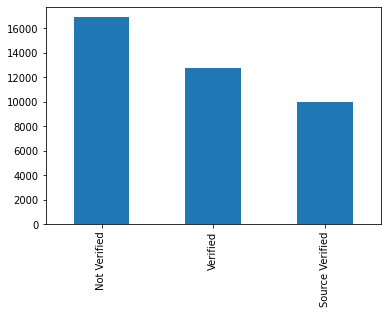

In [124]:
df.verification_status.value_counts().plot(kind='bar')
#Below graph indicates higher no of memebers who are not verified  about their income

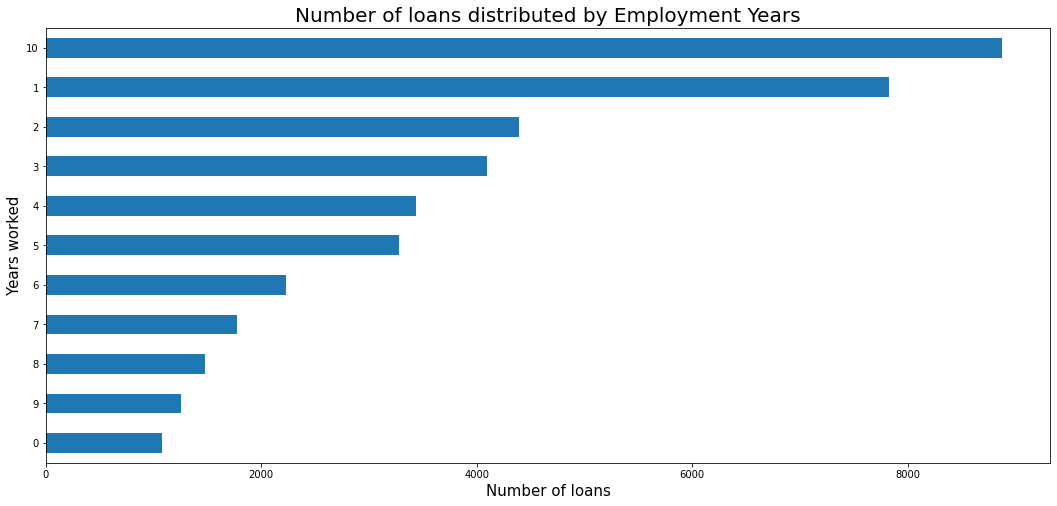

In [125]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);


In [136]:
col1, col2 = "annual_inc", "loan_amnt"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))
corr

Correlation between  annual_inc  and  loan_amnt is:  0.27


0.2711485508165456

In [138]:
col1, col2 = "total_pymnt_inv", "total_pymnt"
corr = df[col1].corr(df[col2])
print("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))
corr

Correlation between  total_pymnt_inv  and  total_pymnt is:  0.97


0.9708145208132944

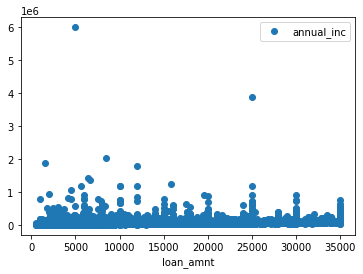

In [141]:
df.plot(x='loan_amnt', y='annual_inc', style='o')
#figure indicates that 90% members taken loan amount upto 35000 who have got average income of 100000